In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('/content/zomato.csv', encoding='latin-1')
df.sample(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
4515,18458347,The Midnight Heroes,1,New Delhi,"Kamla Nagar Market, Kamla Nagar, New Delhi",Kamla Nagar,"Kamla Nagar, New Delhi",77.203928,28.680862,"North Indian, Biryani, Chinese, Fast Food",...,Indian Rupees(Rs.),No,Yes,Yes,No,2,3.8,Yellow,Good,41
4443,18386707,Cafe Filter,1,New Delhi,"B-33, 1st Floor, Kalkaji, New Delhi",Kalkaji,"Kalkaji, New Delhi",77.252686,28.542704,"Fast Food, Italian, North Indian, Chinese",...,Indian Rupees(Rs.),No,Yes,No,No,2,3.6,Yellow,Good,22


In [5]:
df.shape

(9551, 21)

In [6]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [9]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
[features for features in df.columns if df[features].isnull().sum() > 0]

['Cuisines']

<Axes: >

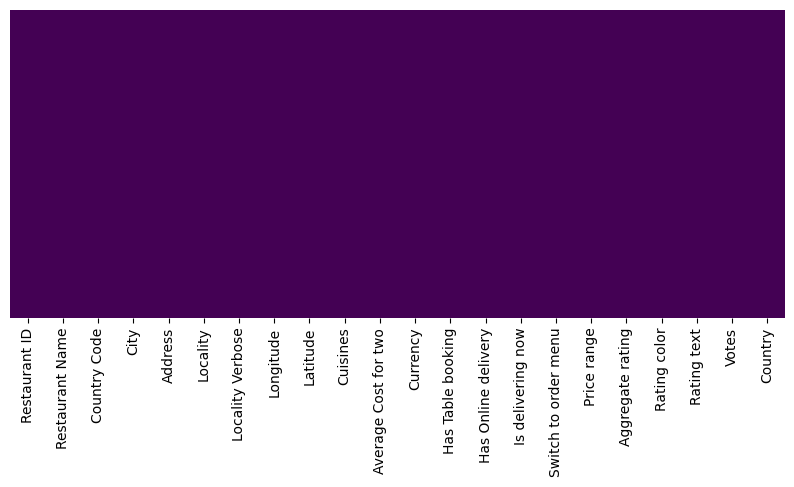

In [37]:
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [13]:
country_code = pd.read_excel('/content/Country-Code.xlsx')
country_code.sample(5)

,Country Code,Country
3,37,Canada
8,184,Singapore
13,215,United Kingdom
2,30,Brazil
5,148,New Zealand


In [14]:
df = pd.merge(df, country_code, on='Country Code', how='left')

In [15]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [16]:
country_names=df.Country.value_counts().index

In [17]:
country_count=df.Country.value_counts().values

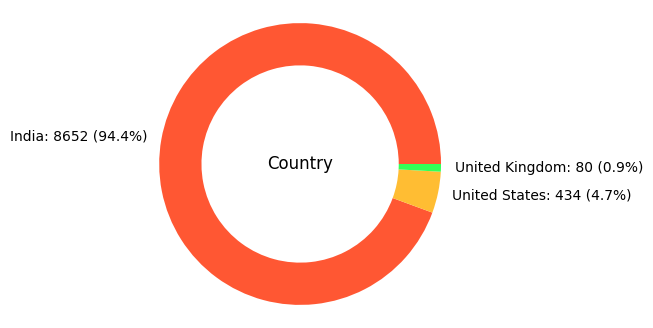

In [18]:
data = country_count[:3]
subj = country_names[:3]

# Create a pie chart with a hole in the center
labels = [f'{subj[i]}: {data[i]} ({data[i]/sum(data)*100:.1f}%)' for i in range(len(subj))]
wedgeprops = {'width': 0.3}  # Adjust the width to create a hole

# Specify the figure size
plt.figure(figsize=(4, 4))  # Adjust the size as needed

plt.pie(data, labels=labels, autopct='', colors=['#FF5733', '#FFBD33', '#33FF57', '#33FFBD', '#5733FF'], wedgeprops=wedgeprops)

# Set the aspect ratio to be equal, ensuring that the pie is circular
plt.axis('equal')

# Add the title in the center of the hole
plt.text(0, 0, 'Country', fontsize=12, ha='center', va='center')

plt.show()

Observation:- Zomato Maximum Records or Transactions are from India then UK then US (India > UK > US)

In [19]:
rating = df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index(name='count')

In [20]:
rating.head(3)

,Aggregate rating,Rating color,Rating text,count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2


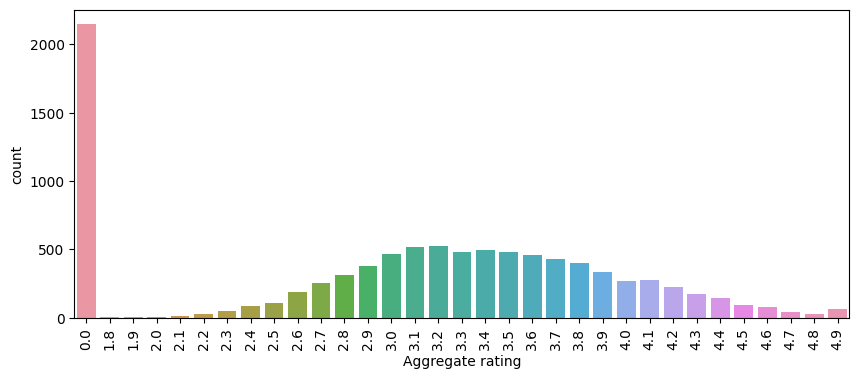

In [36]:
plt.figure(figsize=(10, 4))

sns.barplot(x='Aggregate rating', y='count', data=rating)

plt.xticks(rotation=90)

plt.show()

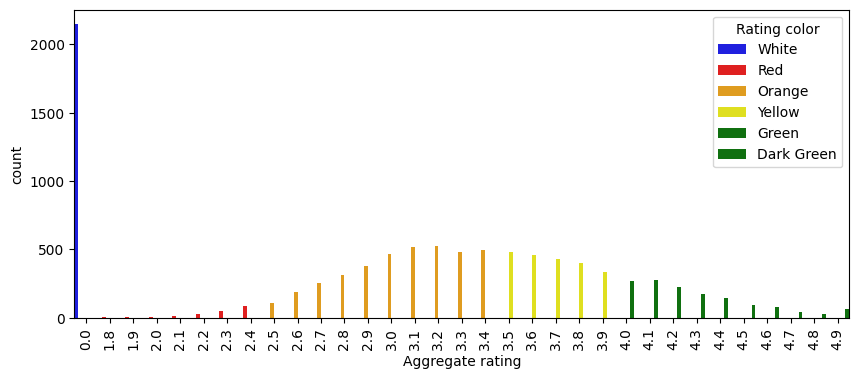

In [55]:
plt.figure(figsize=(10, 4))

sns.barplot(x='Aggregate rating', y='count', data=rating, hue='Rating color', palette=['blue', 'red', 'orange', 'yellow', 'green', 'green'], width=1)

plt.xticks(rotation=90)

plt.show()

In [71]:
df[df['Aggregate rating'] == 0]['Country'].value_counts().reset_index().rename(columns={'index': 'Country', 'Country': 'Rating Count'})

,Country,Rating Count
0,India,2139
1,Brazil,5
2,United States,3
3,United Kingdom,1


In [73]:
df.iloc[0, :]

Restaurant ID                                                     6317637
Restaurant Name                                          Le Petit Souffle
Country Code                                                          162
City                                                          Makati City
Address                 Third Floor, Century City Mall, Kalayaan Avenu...
Locality                        Century City Mall, Poblacion, Makati City
Locality Verbose        Century City Mall, Poblacion, Makati City, Mak...
Longitude                                                      121.027535
Latitude                                                        14.565443
Cuisines                                       French, Japanese, Desserts
Average Cost for two                                                 1100
Currency                                                 Botswana Pula(P)
Has Table booking                                                     Yes
Has Online delivery                   

In [85]:
df[['Country', 'Currency']].value_counts().reset_index().drop(0, axis=1)

,Country,Currency
0,India,Indian Rupees(Rs.)
1,United States,Dollar($)
2,United Kingdom,Pounds(£)
3,Brazil,Brazilian Real(R$)
4,South Africa,Rand(R)
5,UAE,Emirati Diram(AED)
6,New Zealand,NewZealand($)
7,Turkey,Turkish Lira(TL)
8,Australia,Dollar($)
9,Phillipines,Botswana Pula(P)


In [93]:
df[df['Has Online delivery'] == 'Yes']['Country'].unique()

array(['UAE', 'India'], dtype=object)

In [94]:
df[['Country', 'Has Online delivery']].value_counts().reset_index().drop(0, axis=1)

,Country,Has Online delivery
0,India,No
1,India,Yes
2,United States,No
3,United Kingdom,No
4,South Africa,No
5,Brazil,No
6,New Zealand,No
7,Turkey,No
8,UAE,No
9,UAE,Yes


In [96]:
city_names=df.City.value_counts().index
city_count=df.City.value_counts().values

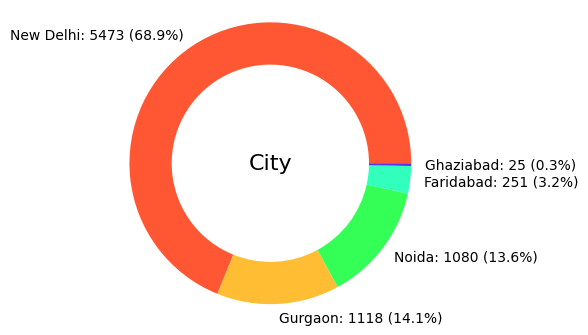

In [102]:
data = city_count[:5]
subj = city_names[:5]

# Create a pie chart with a hole in the center
labels = [f'{subj[i]}: {data[i]} ({data[i]/sum(data)*100:.1f}%)' for i in range(len(subj))]
wedgeprops = {'width': 0.3}  # Adjust the width to create a hole

# Specify the figure size
plt.figure(figsize=(4, 4))  # Adjust the size as needed

plt.pie(data, labels=labels, autopct='', colors=['#FF5733', '#FFBD33', '#33FF57', '#33FFBD', '#5733FF'], wedgeprops=wedgeprops)

# Set the aspect ratio to be equal, ensuring that the pie is circular
plt.axis('equal')

# Add the title in the center of the hole
plt.text(0, 0, 'City', fontsize=16, ha='center', va='center')

plt.show()

In [122]:
df['Cuisines'].str.split(', ')

0             [French, Japanese, Desserts]
1                               [Japanese]
2       [Seafood, Asian, Filipino, Indian]
3                        [Japanese, Sushi]
4                       [Japanese, Korean]
                       ...                
9546                             [Turkish]
9547     [World Cuisine, Patisserie, Cafe]
9548              [Italian, World Cuisine]
9549                     [Restaurant Cafe]
9550                                [Cafe]
Name: Cuisines, Length: 9551, dtype: object

In [131]:
cuisines = df['Cuisines'].str.split(', ').explode().value_counts().head(10).reset_index().rename(columns={'index': 'Cuisines', 'Cuisines': 'Count'})

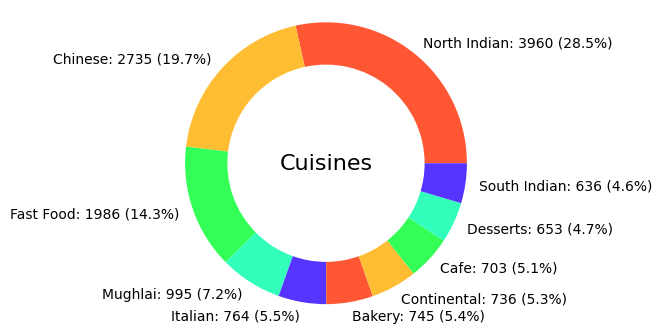

In [132]:
data = cuisines.Count
subj = cuisines.Cuisines

# Create a pie chart with a hole in the center
labels = [f'{subj[i]}: {data[i]} ({data[i]/sum(data)*100:.1f}%)' for i in range(len(subj))]
wedgeprops = {'width': 0.3}  # Adjust the width to create a hole

# Specify the figure size
plt.figure(figsize=(4, 4))  # Adjust the size as needed

plt.pie(data, labels=labels, autopct='', colors=['#FF5733', '#FFBD33', '#33FF57', '#33FFBD', '#5733FF'], wedgeprops=wedgeprops)

# Set the aspect ratio to be equal, ensuring that the pie is circular
plt.axis('equal')

# Add the title in the center of the hole
plt.text(0, 0, 'Cuisines', fontsize=16, ha='center', va='center')

plt.show()